<a href="https://colab.research.google.com/github/martin-fabbri/colab-notebooks/blob/master/deeplearning.ai/nlp/c1_w3_lecture_02_word_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Manipulating Word Embeddings

This notebook explores how to apply linear algebra to find analogies between words manually.

In [1]:
!wget 'https://github.com/martin-fabbri/colab-notebooks/raw/master/data/nlp/word_embeddings_subset.p'

--2020-11-03 14:23:13--  https://github.com/martin-fabbri/colab-notebooks/raw/master/data/nlp/word_embeddings_subset.p
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/martin-fabbri/colab-notebooks/master/data/nlp/word_embeddings_subset.p [following]
--2020-11-03 14:23:13--  https://raw.githubusercontent.com/martin-fabbri/colab-notebooks/master/data/nlp/word_embeddings_subset.p
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 309156 (302K) [application/octet-stream]
Saving to: ‘word_embeddings_subset.p’

word_embeddings_sub 100%[===================>] 301.91K  --.-KB/s    in 0.05s   

2020-11-03 14:23:1

In [2]:
import pandas as pd
import numpy as np
import pickle 

word_embeddings_url = 'word_embeddings_subset.p'
word_embeddings = pickle.load(open(word_embeddings_url, 'rb'))
len(word_embeddings)

243

Now that the model is loaded, we can take a look at the word representations. First, note that the `word embeddings` is a dictionary. Each word is the key to the entry, and the value is its corresponding vector presentation. Remember that square brackers allow access to an entry if the key exists. 

In [3]:
country_vector = word_embeddings['country']
print(f'vector type: {type(country_vector)}')
print(f'vector shape: {country_vector.shape}')
country_vector[:3]

vector type: <class 'numpy.ndarray'>
vector shape: (300,)


array([-0.08007812,  0.13378906,  0.14355469], dtype=float32)

It is important to note that we store each vector as a np array. It allows us to use the linear algebra operations on it.

The vectors have a a size of 300, while the vocabulary size of Google News is around 3 million words!

In [4]:
def vec(w):
  return word_embeddings[w]

## Operating on word embeddings

Remember that understanding that data is one of the most critical steps in Data Science. Word embeddings are the result of machine learning processes and will be part of the input for further processes. These word embedding needs to be validated or at least understood because the performance of the derived model will strongly depend on its quality.

Word embeddings are multimentional arrays, usually with hundres of attributes that pose a challange for its interpretation.

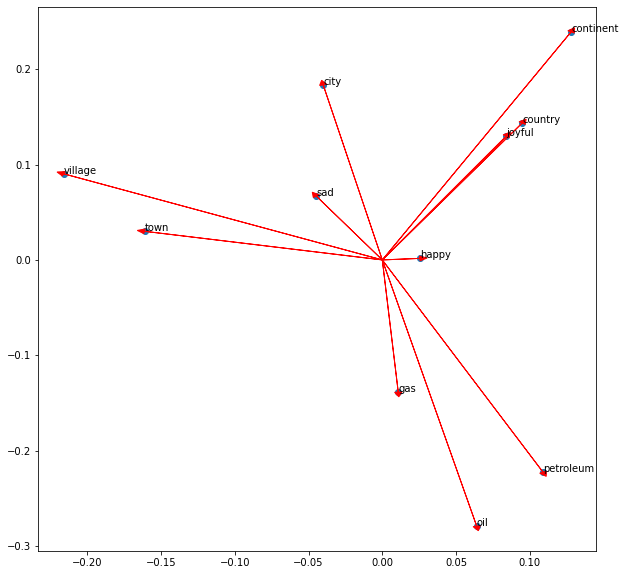

In [10]:
import matplotlib.pyplot as plt # Import matplotlib

words = ['oil', 'gas', 'happy', 'sad', 'city', 'town', 'village', 'country', 'continent', 'petroleum', 'joyful']

bag2d = np.array([vec(word) for word in words]) # Convert each word to its vector representation

fig, ax = plt.subplots(figsize = (10, 10)) # Create custom size image

col1 = 3 # Select the column for the x axis
col2 = 2 # Select the column for the y axis

# Print an arrow for each word
for word in bag2d:
    ax.arrow(0, 0, word[col1], word[col2], head_width=0.005, head_length=0.005, fc='r', ec='r', width = 1e-5)

    
ax.scatter(bag2d[:, col1], bag2d[:, col2]); # Plot a dot for each word

# Add the word label over each dot in the scatter plot
for i in range(0, len(words)):
    ax.annotate(words[i], (bag2d[i, col1], bag2d[i, col2]))

plt.show()

Note that similar words like 'village' and 'town' (or 'petroleum' and 'gas') tend to point in the same direction. Also, note that 'sad' and 'happy' look close to each other; but, their vectors point on different directions.

## Word Distance

Now plot the words 'sad', 'happy', 'town' and 'village'. In this same chart, display the vector from 'village' to 'town' and the vector from 'sad' to 'happy'. Let us use NumPy for these linear algebra operations.

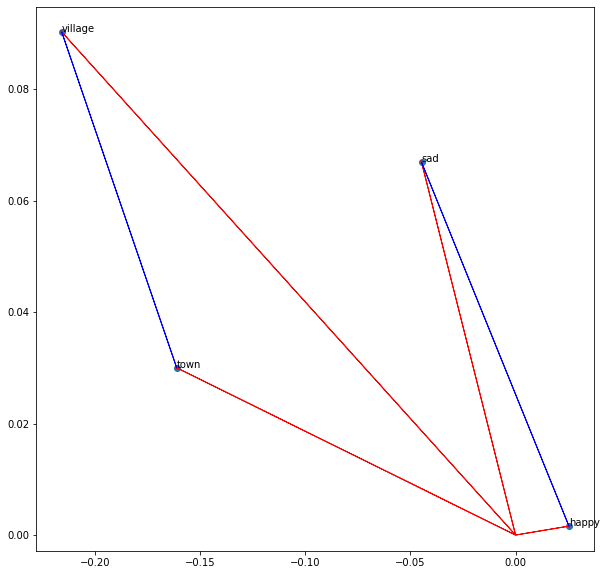

In [19]:
words = ['sad', 'happy', 'town', 'village']

bag2d = np.array([vec(word) for word in words]) # Convert each word to its vector representation

fig, ax = plt.subplots(figsize = (10, 10)) # Create custom size image

col1 = 3 # Select the column for the x axe
col2 = 2 # Select the column for the y axe

# Print an arrow for each word
for word in bag2d:
    ax.arrow(0, 0, word[col1], word[col2], head_width=0.0005, head_length=0.0005, fc='r', ec='r', width = 1e-5)
    
# print the vector difference between village and town
village = vec('village')
town = vec('town')
diff = town - village
ax.arrow(village[col1], village[col2], diff[col1], diff[col2], fc='b', ec='b', width = 1e-5)

# print the vector difference between village and town
sad = vec('sad')
happy = vec('happy')
diff = happy - sad
ax.arrow(sad[col1], sad[col2], diff[col1], diff[col2], fc='b', ec='b', width = 1e-5)


ax.scatter(bag2d[:, col1], bag2d[:, col2]);

# Add the word label over each dot in the scatter plot
for i in range(0, len(words)):
    ax.annotate(words[i], (bag2d[i, col1], bag2d[i, col2]))

## Linear Algebra on Word Embeddings

To start, get the norm of a word in the word embedding.

In [24]:
print(f'Norm vector town: {np.linalg.norm(vec("town"))}')
print(f'Norm vector sad: {np.linalg.norm(vec("sad"))}')

Norm vector town: 2.3858096599578857
Norm vector sad: 2.9004838466644287


Now, appliying vector difference and addition, one can create a vector representation for a new word. For example, we can say that the vector difference between 'France' and 'Paris' represents the concepts of Capital.

In [25]:
capital = vec('France') - vec('Paris')
country = vec('Madrid') + capital
print(country[0:5])

[-0.02905273 -0.2475586   0.53952026  0.20581055 -0.14862823]


We can observe that the vector 'country' that we expected to be the same as the vector for Spain is not exactly it.

In [27]:
diff = country - vec('Spain')
print(diff[0:5])

[-0.06054688 -0.06494141  0.37643433  0.08129883 -0.13007355]


So, we have to look for the closest words in the embedding that matches the candidate country. If the word embedding works as expected, the most similar word must be 'Spain'. Let us define a function that helps us to do it. We will store our word embedding as a DataFrame, which facilitate the lookup operations based on the numerical vectors.

In [36]:
keys = word_embeddings.keys()
data = [word_embeddings[key] for key in keys]

embedding = pd.DataFrame(data=data, index=keys)
embedding.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
country,-0.080078,0.133789,0.143555,0.094727,-0.047363,-0.023560,-0.008545,-0.186523,0.045898,-0.081543,-0.034424,-0.116211,0.217773,-0.103516,-0.066895,0.153320,-0.193359,0.263672,-0.136719,-0.055664,0.074707,-0.000710,0.093750,-0.144531,0.042969,-0.019165,-0.225586,-0.126953,-0.016846,0.052246,0.062500,-0.148438,-0.019653,0.175781,0.106445,-0.047607,-0.102539,-0.285156,0.103516,0.208008,...,-0.021362,-0.080566,0.243164,0.155273,0.165039,0.008545,-0.122559,0.086914,-0.119141,-0.029419,0.083496,-0.031006,0.139648,-0.051514,0.007660,-0.044434,-0.049805,-0.032227,-0.009521,-0.108887,-0.103027,-0.157227,0.193359,0.048584,0.015625,-0.081055,-0.116211,-0.019897,0.057373,0.061035,-0.145508,0.067383,-0.244141,-0.077148,0.047607,-0.075195,-0.149414,-0.044189,0.097168,0.067383
city,-0.010071,0.057373,0.183594,-0.040039,-0.029785,-0.079102,0.071777,0.013306,-0.143555,0.011292,-0.032715,0.077637,0.154297,-0.063965,-0.108887,-0.019043,-0.069336,-0.053467,-0.087891,0.008118,-0.169922,-0.081543,-0.002686,-0.105957,0.059326,-0.158203,-0.030762,0.165039,-0.197266,-0.015137,0.100098,-0.096680,-0.072266,0.232422,-0.041260,-0.181641,0.022339,0.046875,0.107910,0.024902,...,-0.139648,-0.073730,-0.068359,0.050537,0.164062,0.116699,0.024780,-0.075684,-0.199219,-0.065430,-0.058105,-0.182617,-0.072754,-0.037842,0.000108,-0.228516,0.046143,0.039062,0.015869,-0.102539,-0.113770,-0.100098,0.279297,0.043945,0.114746,0.174805,-0.086426,-0.052734,0.063477,0.139648,0.024292,-0.168945,-0.062988,0.117188,-0.020508,0.030273,-0.247070,-0.122559,0.076172,-0.234375
China,-0.073242,0.135742,0.108887,0.083008,-0.127930,-0.227539,0.151367,-0.045654,-0.065430,0.034424,-0.140625,-0.023560,0.246094,-0.271484,-0.187500,-0.118652,-0.064941,0.035156,0.014221,-0.128906,0.225586,-0.326172,0.020142,-0.016846,0.079590,0.152344,-0.041260,0.049561,-0.066895,0.382812,-0.051758,-0.166016,-0.421875,-0.117676,0.199219,-0.051514,-0.061768,0.162109,0.347656,0.210938,...,0.026245,-0.084961,0.359375,-0.069824,0.219727,0.085449,-0.296875,-0.188477,0.182617,0.185547,-0.316406,0.107422,0.022095,-0.094238,-0.006348,0.059326,-0.089355,-0.112305,0.027466,-0.042725,0.055908,0.056885,0.216797,-0.053955,-0.039551,0.039307,-0.093262,0.175781,0.011658,0.189453,0.140625,0.087402,0.152344,0.079590,0.006348,-0.037842,-0.183594,0.137695,0.093750,-0.079590


In [35]:
def find_closest_word(v, k=1):
  diff = embedding.values - v
  delta = np.sum(diff * diff, axis=1)
  i = np.argmin(delta)
  return embedding.iloc[i].name

In [37]:
find_closest_word(country)

'Spain'

Predict other countries

In [38]:
find_closest_word(vec('Italy') -vec('Rome') + vec('Madrid'))

'Spain'

In [41]:
find_closest_word(vec('Berlin') + capital)

'Germany'

In [43]:
find_closest_word(vec('Chile') + capital)

'Chile'

Represent a sentence as a vector

A whole sentence can be represented as a vector by summng all the vectors that conform to the sentence. 

In [44]:
doc = "Spain petroleum city king"
vdoc = [vec(x) for x in doc.split(' ')]
doc2vec = np.sum(vdoc, axis=0)
doc2vec

array([ 2.87475586e-02,  1.03759766e-01,  1.32629395e-01,  3.33007812e-01,
       -2.61230469e-02, -5.95703125e-01, -1.25976562e-01, -1.01306152e+00,
       -2.18544006e-01,  6.60705566e-01, -2.58300781e-01, -2.09960938e-02,
       -7.71484375e-02, -3.07128906e-01, -5.94726562e-01,  2.00561523e-01,
       -1.04980469e-02, -1.10748291e-01,  4.82177734e-02,  6.38977051e-01,
        2.36083984e-01, -2.69775391e-01,  3.90625000e-02,  4.16503906e-01,
        2.83416748e-01, -7.25097656e-02, -3.12988281e-01,  1.05712891e-01,
        3.22265625e-02,  2.38403320e-01,  3.88183594e-01, -7.51953125e-02,
       -1.26281738e-01,  6.60644531e-01, -7.89794922e-01, -7.04345703e-02,
       -1.14379883e-01, -4.78515625e-02,  4.76318359e-01,  5.31127930e-01,
        8.10546875e-02, -1.17553711e-01,  1.02050781e+00,  5.59814453e-01,
       -1.17187500e-01,  1.21826172e-01, -5.51574707e-01,  1.44531250e-01,
       -7.66113281e-01,  5.36102295e-01, -2.80029297e-01,  3.85986328e-01,
       -2.39135742e-01, -

In [45]:
find_closest_word(doc2vec)

'petroleum'